In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8

In [61]:
branching_probability = 1e-3
max_depth     = 5
max_length    = 2000
reduce_factor = 0.8
n_trees       = 3

def previous_float(xs, ys):
    for x, y in zip(reversed(xs), reversed(ys)):
        if isinstance(x, float):
            return x, y

def generate_tree(x0, y0, p, l, d):
    xs = [float(x0)]
    ys = [float(y0)]
    n  = 0
    if d:
        while n < l:
            b = np.random.uniform()
            x, y = previous_float(xs, ys)
            
            if b < p:
                new_l  = int(reduce_factor * l)
                bx, by = generate_tree(x, y, p, new_l, d - 1)
                xs.append(bx)
                ys.append(by)
                continue

            xs.append(x + np.random.uniform(-1, 1))
            ys.append(y + 1)
            n += 1

    return xs, ys

def flatten(xs):
    ys = []
    try:
        for x in xs:
            try             : ys.extend(flatten(x))
            except TypeError: ys.append(x)
    except TypeError:
        return xs
    return ys

x, y = map(flatten, generate_tree(0, 0, branching_probability, max_length, max_depth))

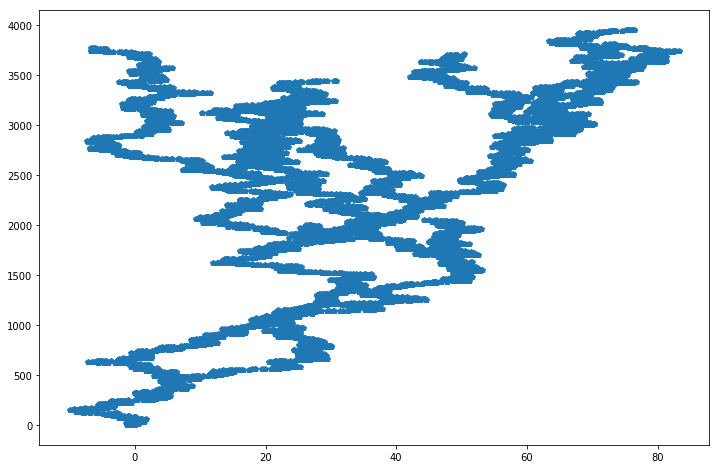

In [62]:
plt.plot(x, y, "p")